The main objective of this task is to train feed-forward multi-layer perceptron networks with two hidden layers to approximate the following function:
y = sin( 3.5 x1 + 1.0 ) cos( 5.5 x2 ), x1, x2 [-1, 1]
Implement the algorithm in a computer language of your choice, although you are strongly recommended to use the Python libraries used in class.

Visualise the function with a 3D surface plot, in the given range. Use of NumPy for numbers is recommended.

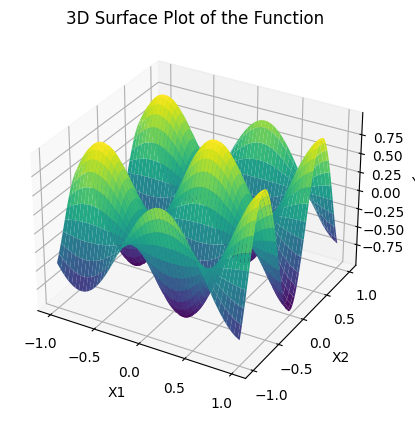

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import torch
from torch.nn import Linear, MSELoss
from torch.optim import SGD
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the function
def func(x1, x2):
    return np.sin(3.5 * x1 + 1.0) * np.cos(5.5 * x2)

# Generate data points for x1 and x2
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
y = func(x1, x2)

# Create 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.title('3D Surface Plot of the Function')
plt.show()


Randomly generate 1100 samples for x1 and x2 within [-1,1]. Calculate the corresponding y values for the 1100 samples. Use
1000 of them as the training dataset, and the other 100 samples as a test dataset. It is recommended to store your
data as a tensor (to make it easier to use in the neural net later), e.g. x = torch.as_tensor(data, dtype=torch.double)
Visualise the training and test data (two separate plots) in a three-dimensional graphics, e.g. scatter3D(x1, x2, z, c=z).

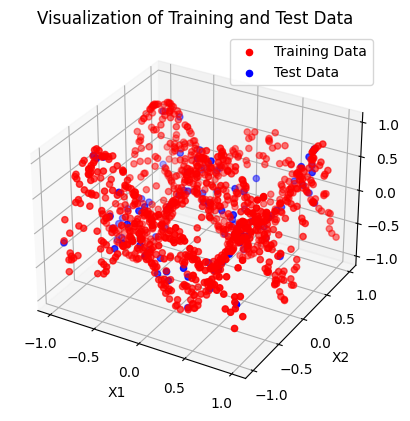

In [2]:
# Randomly generate 1100 samples for x1 and x2
np.random.seed(0)
x1_data = np.random.uniform(-1, 1, 1100)
x2_data = np.random.uniform(-1, 1, 1100)

# Calculate corresponding y values
y_data = [func(x1, x2) for x1, x2 in zip(x1_data, x2_data)]

df = pd.DataFrame({'x1': x1_data, 'x2': x2_data, 'y': y_data})

# Split the data into training and test datasets
train, test = train_test_split(df, test_size=0.0901, random_state=42)

# Convert data to tensors
x_train = torch.tensor(train[['x1', 'x2']].values, dtype=torch.float32)
y_train = torch.tensor(train['y'].values, dtype=torch.float32)
x_test = torch.tensor(test[['x1', 'x2']].values, dtype=torch.float32)
y_test = torch.tensor(test['y'].values, dtype=torch.float32)


# Convert tensors to numpy arrays
x_train_np = x_train.numpy()
y_train_np = y_train.numpy()
x_test_np = x_test.numpy()
y_test_np = y_test.numpy()

# Visualize training and test data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train_np[:, 0], x_train_np[:, 1], y_train_np, c='r', label='Training Data')
ax.scatter(x_test_np[:, 0], x_test_np[:, 1], y_test_np, c='b', label='Test Data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.title('Visualization of Training and Test Data')
plt.legend()
plt.show()


Assume that the neural network has six hidden neurons in each of the hidden layers and the network is fully connected. There is a threshold/bias connection for all hidden nodes and the output node. The activation function used is a sigmoid
function in the hidden neurons, and a linear activation function in the output neuron. Write the code that creates the
network3. Implement Neural Network:

Epoch [1/600], Loss: 0.2837
Epoch [2/600], Loss: 0.2734
Epoch [3/600], Loss: 0.2653
Epoch [4/600], Loss: 0.2588
Epoch [5/600], Loss: 0.2537
Epoch [6/600], Loss: 0.2497
Epoch [7/600], Loss: 0.2465
Epoch [8/600], Loss: 0.2440
Epoch [9/600], Loss: 0.2421
Epoch [10/600], Loss: 0.2405
Epoch [11/600], Loss: 0.2392
Epoch [12/600], Loss: 0.2383
Epoch [13/600], Loss: 0.2375
Epoch [14/600], Loss: 0.2369
Epoch [15/600], Loss: 0.2364
Epoch [16/600], Loss: 0.2360
Epoch [17/600], Loss: 0.2357
Epoch [18/600], Loss: 0.2355
Epoch [19/600], Loss: 0.2353
Epoch [20/600], Loss: 0.2351
Epoch [21/600], Loss: 0.2350
Epoch [22/600], Loss: 0.2349
Epoch [23/600], Loss: 0.2348
Epoch [24/600], Loss: 0.2348
Epoch [25/600], Loss: 0.2347
Epoch [26/600], Loss: 0.2347
Epoch [27/600], Loss: 0.2347
Epoch [28/600], Loss: 0.2346
Epoch [29/600], Loss: 0.2346
Epoch [30/600], Loss: 0.2346
Epoch [31/600], Loss: 0.2346
Epoch [32/600], Loss: 0.2346
Epoch [33/600], Loss: 0.2346
Epoch [34/600], Loss: 0.2346
Epoch [35/600], Loss: 0

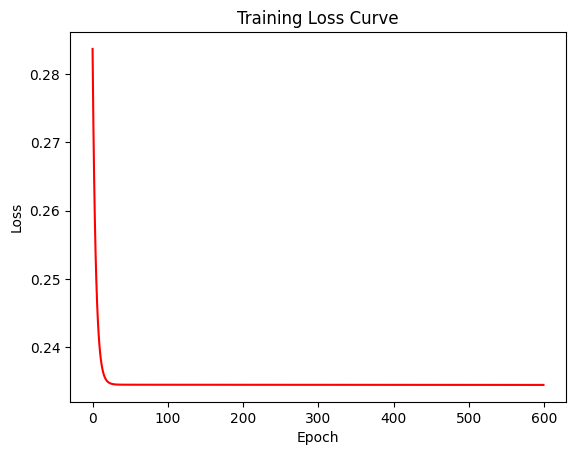

Mean Squared Error on Test Data: 0.21447834372520447


In [3]:
# Define the neural network architecture
class Network(torch.nn.Module):
    def __init__(self, n_features, n_hiddlay1, n_hiddlay2, n_out):
        super(Network, self).__init__()
        self.hiddlay1 = torch.nn.Linear(n_features, n_hiddlay1)
        self.hiddlay2 = torch.nn.Linear(n_hiddlay1, n_hiddlay2)
        self.out = torch.nn.Linear(n_hiddlay2, n_out)

    def forward(self, x):
        x = torch.sigmoid(self.hiddlay1(x))
        x = torch.sigmoid(self.hiddlay2(x))
        x = self.out(x)
        return x

# Initialize the neural network
model = Network(n_features=2, n_hiddlay1=6, n_hiddlay2=6, n_out=1)

# Define the loss function and optimizer
criterion = MSELoss()
optimizer = SGD(model.parameters(), lr=0.02)

# Training loop
loss_values = []
for epoch in range(600):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())
    print(f"Epoch [{epoch+1}/600], Loss: {loss.item():.4f}")

# Plot the loss curve
plt.plot(loss_values, 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# Evaluate the model
with torch.no_grad():
    predicted = model(x_test)
    mse = criterion(predicted, y_test.view(-1, 1))
    print('Mean Squared Error on Test Data:', mse.item())


Write the following two functions: weightsOutofNetwork: extracts all the weights of the network and puts them in one list; returns this list. weightsIntoNetwork: takes as input a list of all weights of the network and uses them to set the weights of the network Write a test to check if the weights are retrieved and inserted in the network correctly. Show the following test results in your report: use weightsOutofNetwork to retrieve all weights; print out the first layer of weights (connecting input to hidden); change three of these weights; insert all weights back in the network using weightsIntoNetwork; use weightsOutofNetwork to retrieve all weights again, and print out the first layer to check. Highlight the changed weights, e.g. in bold.

In [4]:
# function for weights into network
def weightsIntoNetwork(w):
    hiddlayer1 = torch.FloatTensor(w[:12].reshape(6,2))
    hiddlayer2 = torch.FloatTensor(w[12:48].reshape(6,6))
    outlayer = torch.FloatTensor(w[48:54].reshape(1,6))
    hiddbias1 = torch.FloatTensor(w[54:60])
    hiddbias2 = torch.FloatTensor(w[60:66])
    outbias = torch.FloatTensor(w[66:67])
    model.hiddlay1.weight = torch.nn.parameter.Parameter(hiddlayer1)
    model.hiddlay2.weight = torch.nn.parameter.Parameter(hiddlayer2)
    model.out.weight = torch.nn.parameter.Parameter(outlayer)
    model.hiddlay1.bias = torch.nn.parameter.Parameter(hiddbias1)
    model.hiddlay2.bias = torch.nn.parameter.Parameter(hiddbias2)
    model.out.bias = torch.nn.parameter.Parameter(outbias)
    

In [5]:
def weightsOutofNetwork(Neural):
    hiddenlayerwts_1 = list(np.array(Neural.hiddlay1.weight.reshape(-1).tolist()))
    hiddenlayerwts_2 = list(np.array(Neural.hiddlay2.weight.reshape(-1).tolist()))
    out_wt = list(np.array(Neural.out.weight.reshape(-1).tolist()))
    hiddenlayerbias_1 = list(np.array(Neural.hiddlay1.bias.tolist()))
    hiddenlayerbias_2 = list(np.array(Neural.hiddlay2.bias.tolist()))
    bias_out = list(np.array(Neural.out.bias.tolist()))
    return list(hiddenlayerwts_1 + hiddenlayerbias_1 + hiddenlayerwts_2 + hiddenlayerbias_1 + out_wt + bias_out)


In [6]:
weights = np.random.uniform(-1,1, (67))  
weights

array([-0.79585654,  0.51387065, -0.32069795,  0.27593709,  0.20756581,
       -0.22834406,  0.06313544,  0.29027707,  0.88190066,  0.15126815,
        0.22873502, -0.86428836,  0.90443163,  0.05616386,  0.60254684,
       -0.89941787, -0.15817973, -0.48604908, -0.4660482 ,  0.58290746,
        0.24773345, -0.12050938, -0.97882852,  0.92985589,  0.92404651,
       -0.56489558, -0.91730726,  0.06039873,  0.90282163,  0.82079169,
        0.16932573, -0.3929023 , -0.34007823,  0.7958271 , -0.01643193,
       -0.73776754, -0.50314905, -0.4464102 , -0.75290663, -0.07391124,
        0.83210182,  0.33756509, -0.85505215, -0.98901036, -0.44750467,
       -0.27461413,  0.55349934,  0.93401105, -0.22486565,  0.37338006,
        0.98980381,  0.49133317,  0.2723791 , -0.84385029, -0.3535696 ,
        0.82678432, -0.59798904,  0.68718072,  0.39264737, -0.26735126,
        0.05834854,  0.08561294,  0.42810757,  0.03311188, -0.73384802,
        0.54690934, -0.18745501])

In [7]:
weightsIntoNetwork(weights)
weightsOutofNetwork(model)

[-0.7958565354347229,
 0.5138706564903259,
 -0.32069796323776245,
 0.2759370803833008,
 0.2075658142566681,
 -0.22834406793117523,
 0.06313544511795044,
 0.29027706384658813,
 0.8819006681442261,
 0.1512681394815445,
 0.2287350296974182,
 -0.8642883896827698,
 -0.3535695970058441,
 0.8267843127250671,
 -0.597989022731781,
 0.6871806979179382,
 0.3926473557949066,
 -0.26735126972198486,
 0.9044316411018372,
 0.05616385489702225,
 0.6025468111038208,
 -0.8994178771972656,
 -0.15817973017692566,
 -0.486049085855484,
 -0.4660482108592987,
 0.5829074382781982,
 0.2477334439754486,
 -0.12050937861204147,
 -0.9788285493850708,
 0.9298558831214905,
 0.924046516418457,
 -0.5648955702781677,
 -0.9173072576522827,
 0.06039872765541077,
 0.9028216004371643,
 0.8207916617393494,
 0.16932572424411774,
 -0.39290228486061096,
 -0.3400782346725464,
 0.7958270907402039,
 -0.016431929543614388,
 -0.7377675175666809,
 -0.5031490325927734,
 -0.446410208940506,
 -0.7529066205024719,
 -0.07391123473644257,
 

Use a binary coded genetic algorithm (with Gray coding) for optimising the weights of the neural network to fit the
function, by minimising the mean squared error on the training dataset. Your evaluation function should extract weights from the chromosome and insert all weights in the network using weightsIntoNetwork, the loss of the network on the training data should then be used as the fitness of the individual. Use 30 bits for encoding each weight and limit weights to the range [-20,20]. It will help to initialise your individuals to a smaller range (e.g. [-1,1]).
Experiment with hyperparameters to get a good result. Show your complete code, with hyperparameters clearly named at the
top. Give a brief justification for your choice of hyperparameters. Show a plot of the training and test error across the
generations.

In [8]:
import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from deap import creator, base, tools, algorithms

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

popSize     = 50 #Population size
dimension   = 67 #Numer of decision variable x 
numOfBits   = 30 #Number of bits in the decision variable
iterations  = 200 #Number of generations to be run
dspInterval = 10
nElitists   = 1 #number of elite individuals selected
omega       = 5
crossPoints = 2 #variable not used. instead tools.cxTwoPoint
crossProb   = 0.6
flipProb    = 1. / (dimension * numOfBits) #bit mutate prob
mutateprob  = .1 #mutation prob
maxnum      = 2**numOfBits #absolute max size of number coded by binary list 1,0,0,1,1,....


toolbox = base.Toolbox()

# Attribute generator 
#                      define 'attr_bool' to be an attribute ('gene')
#                      which corresponds to integers sampled uniformly
#                      from the range [0,1] (i.e. 0 or 1 with equal
#                      probability)
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
#                         define 'individual' to be an individual
#                         consisting of numOfBits*dimension 'attr_bool' elements ('genes')
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, numOfBits*dimension)

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)




loss_functn=torch.nn.MSELoss()
# the goal ('fitness') function to be maximized
# fitness function: sphere model
# f(x1, x2) = (x1 - 1)^2 + (x2 - 2)^2
def eval_sphere(individual):
    gentdweights=np.asarray(separatevariables(np.asarray(individual)))
    #gentd_wts
    weightsIntoNetwork(gentdweights)
    #f= (sep[0]-1)**2 + (sep[1]-2)**2 
    predic_output=model(x_train)
    loss_get=loss_functn(predic_output,y_train)
    loss_get=loss_get.item()
    # DEAP doesn't allow minimisation for roulette selection
                         # so we convert to maximisation
    return 1.0/(0.01+loss_get), 
#----------
# Operator registration
#----------
# register the goal / fitness function
toolbox.register("evaluate", eval_sphere)

# register the crossover operator
toolbox.register("mate", tools.cxTwoPoint)

# register a mutation operator with a probability to
# flip each attribute/gene of 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)

# operator for selecting individuals for breeding the next
# generation: each individual of the current generation
# is replaced by the 'fittest' (best) of three individuals
# drawn randomly from the current generation.
toolbox.register("select", tools.selRoulette, fit_attr='fitness')

#----------

# Convert chromosome to real number
# input: list binary 1,0 of length numOfBits representing number using gray coding
# output: real value
def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    numinrange=-20+40*numasint/maxnum
    return numinrange

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(ind):
    ind=ind.reshape((dimension,numOfBits))
    nn = [chrom2real(sv)for sv in ind]
    return nn

def main():
    #random.seed(64)
    loss_training=[]
    # create an initial population of individuals (where
    # each individual is a list of integers)
    pop = toolbox.population(n=popSize)
    
#     for individ in pop:
#         sep=separatevariables(individ)
#         print(sep[0],sep[1])

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    #print(fitnesses)
    for ind, fit in zip(pop, fitnesses):
        #print(ind, fit)
        ind.fitness.values = fit
    
    print("  Evaluated %i individuals" % len(pop))

    # Extracting all the fitnesses of 
    fits = [ind.fitness.values[0] for ind in pop]

    # Variable keeping track of the number of generations
    g = 0
    
    # Begin the evolution
    while g < iterations:
        # A new generation
        g = g + 1
        print("-- Generation %i --" % g)
#         for individ in pop:
#             print(individ)
        
        # Select the next generation individuals
        offspring = tools.selBest(pop, nElitists) + toolbox.select(pop,len(pop)-nElitists)
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
        
#         for individ in offspring:
#             print(individ)

    
        # Apply crossover and mutation on the offspring
        # make pairs of offspring for crossing over
        for child1, child2 in zip(offspring[::2], offspring[1::2]):

            # cross two individuals with probability CXPB
            if random.random() < crossProb:
                #print('before crossover ',child1, child2)
                toolbox.mate(child1, child2)
                #print('after crossover ',child1, child2)

                # fitness values of the children
                # must be recalculated later
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:

            # mutate an individual with probability mutateprob
            if random.random() < mutateprob:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        best_ind = tools.selBest(pop, 1)[0]
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        #print("  Evaluated %i individuals" % len(invalid_ind))
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        
        
        
        best_ind = tools.selBest(pop, 1)[0]
        loss_training.append(1/best_ind.fitness.values[0])
        
    
        '''eval_sphere(best_ind)
        teat=Neural_net(val)
        teat=teat.item()
        test_loss.append(teat)'''
        if g%dspInterval ==0:
            # Gather all the fitnesses in one list and print the stats
            fits = [ind.fitness.values[0] for ind in pop]
           
            length = len(pop)
            mean = sum(fits) / length
            sum2 = sum(x*x for x in fits)
            std = abs(sum2 / length - mean**2)**0.5

            print("  Min %s" % min(fits))
            print("  Max %s" % max(fits))
            print("  Avg %s" % mean)
            print("  Std %s" % std)
            
    
    print("-- End of (successful) evolution --")
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
    #print("Decoded x1, x2 is %s, %s" % (separatevariables(best_ind)))
    return loss_training, best_ind

if __name__ == "__main__":
    loss, best_ind = main()

/Users/bharadwajmahanthi/Library/Python/3.11/lib/python/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  Evaluated 50 individuals
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
  Min 0.05809481727320181
  Max 0.3378031953743704
  Avg 0.2589241018144377
  Std 0.07221846781254108
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
  Min 0.06181880525773202
  Max 0.3692088399154355
  Avg 0.3242441853787545
  Std 0.05479423814805658
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
  Min 0.005043016245253158
  Max 0.39067168812362485
  Avg 0.341349264648085
  Std 0.076923464315975
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 

In [9]:
import random
import numpy as np
import torch
import torch.nn as nn
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from deap import creator, base, tools, algorithms

# Initialize DEAP framework
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)


toolbox = base.Toolbox()

# Attribute generator 
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, numOfBits * dimension)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

loss_functn = nn.MSELoss()

# Function to set weights of the neural network
def weightsIntoNetwork(weights):
    # Define network architecture
    model = Network(n_features=2, n_hiddlay1=6, n_hiddlay2=6, n_out=1)
    
    # Set weights of the network
    hidden1_weights = torch.tensor(weights[:12]).reshape(6, 2)
    hidden1_bias = torch.tensor(weights[12:18])
    hidden2_weights = torch.tensor(weights[18:54]).reshape(6, 6)
    hidden2_bias = torch.tensor(weights[54:60])
    out_weights = torch.tensor(weights[60:66]).reshape(1, 6)
    out_bias = torch.tensor(weights[66:67])

    model.hiddlay1.weight.data = hidden1_weights
    model.hiddlay1.bias.data = hidden1_bias
    model.hiddlay2.weight.data = hidden2_weights
    model.hiddlay2.bias.data = hidden2_bias
    model.out.weight.data = out_weights
    model.out.bias.data = out_bias

    return model

# Fitness evaluation function
def eval_sphere(individual):
    gentdweights=np.asarray(separatevariables(np.asarray(individual)))
    #gentd_wts
    weightsIntoNetwork(gentdweights)
    #f= (sep[0]-1)**2 + (sep[1]-2)**2 
    predic_output=model(x_train)
    loss_get=loss_functn(predic_output,y_train)
    loss_get=loss_get.item()
    # DEAP doesn't allow minimisation for roulette selection
                         # so we convert to maximisation
    return 1.0/(0.01+loss_get), 

# Genetic algorithm setup
toolbox.register("evaluate", eval_sphere)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)
toolbox.register("select", tools.selRoulette, fit_attr='fitness')

# Main function
def main():
    loss_test = []
    pop = toolbox.population(n=popSize)

    # Evaluate the initial population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    print("Evaluated %i individuals" % len(pop))

    # Evolution loop
    for g in range(1, iterations + 1):
        print("-- Generation %i --" % g)

        # Select the next generation individuals
        offspring = tools.selBest(pop, nElitists) + toolbox.select(pop, len(pop) - nElitists)
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < crossProb:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutateprob:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the offspring
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Replace the population
        pop[:] = offspring

        # Gather statistics
        fits = [ind.fitness.values[0] for ind in pop]
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x * x for x in fits)
        std = abs(sum2 / length - mean ** 2) ** 0.5

        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)

        best_ind = tools.selBest(pop, 1)[0]
        loss_test.append(1 / best_ind.fitness.values[0])

    print("-- End of (successful) evolution --")
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
    return loss_test, best_ind

if __name__ == "__main__":
    loss_test, best_ind = main()

Evaluated 50 individuals
-- Generation 1 --


/Users/bharadwajmahanthi/Library/Python/3.11/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/bharadwajmahanthi/Library/Python/3.11/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Generation 2 --
  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Generation 3 --
  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Generation 4 --
  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Generation 5 --
  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Generation 6 --
  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Generation 7 --
  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Generation 8 --
  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Generation 9 --
  Min 2.7823880358715503
  Max 2

Show a 3D surface plot of the function implemented by the neural network across the range [-1,1]. To do this compute the
network’s output for a grid of values uniformly covering the range. i.e. similar to 1.1 except using network output instead of the mathematical function.

Evaluated 50 individuals
-- Generation 1 --
  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Generation 2 --
  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Generation 3 --
  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Generation 4 --
  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Generation 5 --
  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Generation 6 --
  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Generation 7 --
  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Generation 8 --
  Min 2.7823880358715503
  Max 2.7823880358715503
  Avg 2.782388035871549
  Std 6.664001874625056e-08
-- Gene

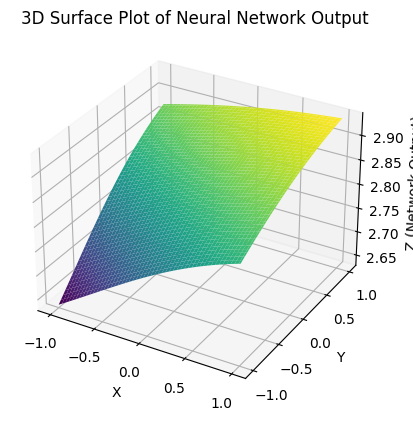

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the neural network architecture
class Network(nn.Module):
    def __init__(self, n_features, n_hiddlay1, n_hiddlay2, n_out):
        super(Network, self).__init__()
        self.hiddlay1 = nn.Linear(n_features, n_hiddlay1)
        self.hiddlay2 = nn.Linear(n_hiddlay1, n_hiddlay2)
        self.out = nn.Linear(n_hiddlay2, n_out)

    def forward(self, x):
        x = torch.sigmoid(self.hiddlay1(x))
        x = torch.sigmoid(self.hiddlay2(x))
        x = self.out(x)
        return x

# Function to convert weights from the DEAP individual to the model's state_dict format
def weightsOutofNetwork(model, individual):
    weights = {}
    hiddenlayerwts_1_size = model.hiddlay1.weight.numel()
    hiddenlayerwts_2_size = model.hiddlay2.weight.numel()
    out_wt_size = model.out.weight.numel()

    hiddenlayerwts_1 = torch.tensor(individual[:hiddenlayerwts_1_size]).reshape(model.hiddlay1.weight.shape)
    hiddenlayerbias_1 = torch.tensor(individual[hiddenlayerwts_1_size:hiddenlayerwts_1_size + model.hiddlay1.bias.numel()])

    hiddenlayerwts_2 = torch.tensor(individual[hiddenlayerwts_1_size + model.hiddlay1.bias.numel():hiddenlayerwts_1_size + model.hiddlay1.bias.numel() + hiddenlayerwts_2_size]).reshape(model.hiddlay2.weight.shape)
    hiddenlayerbias_2 = torch.tensor(individual[hiddenlayerwts_1_size + model.hiddlay1.bias.numel() + hiddenlayerwts_2_size:hiddenlayerwts_1_size + model.hiddlay1.bias.numel() + hiddenlayerwts_2_size + model.hiddlay2.bias.numel()])

    out_wt = torch.tensor(individual[-(out_wt_size + model.out.bias.numel()):-model.out.bias.numel()]).reshape(model.out.weight.shape)
    bias_out = torch.tensor(individual[-model.out.bias.numel():])

    weights['hiddlay1.weight'] = hiddenlayerwts_1
    weights['hiddlay1.bias'] = hiddenlayerbias_1
    weights['hiddlay2.weight'] = hiddenlayerwts_2
    weights['hiddlay2.bias'] = hiddenlayerbias_2
    weights['out.weight'] = out_wt
    weights['out.bias'] = bias_out

    return weights

# Assuming main() is defined elsewhere and it returns loss_test and best_ind
if __name__ == "__main__":
    loss_test, best_ind = main()
    
    # Create an instance of the neural network
    model = Network(n_features=2, n_hiddlay1=6, n_hiddlay2=6, n_out=1)
    
    # Load the trained weights into the network
    trained_weights = weightsOutofNetwork(model, best_ind)
    model.load_state_dict(trained_weights)
    
    # Define the grid of values
    x_range = np.linspace(-1, 1, 100)
    y_range = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x_range, y_range)
    
    # Flatten the grid for input to the neural network
    grid_points = np.column_stack((X.flatten(), Y.flatten()))
    
    # Compute the network's output for each point in the grid
    with torch.no_grad():
        Z = model(torch.tensor(grid_points, dtype=torch.float32)).reshape(X.shape)
    
    # Create the 3D surface plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z.numpy(), cmap='viridis')
    
    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z (Network Output)')
    ax.set_title('3D Surface Plot of Neural Network Output')
    
    # Show the plot
    plt.show()


Write a function which takes a list of weights (output from weightsOutofNetwork) and returns a chromosome (i.e. a long
list of binary bits, in Gray coding). The function should check if weights need to be pushed back into the range [-20,20]. Write a test to test your function: test if weights can be put into a chromosome, and retrieved, and turned back
into weights. Show the results of your test for a small number of weights. Note that numbers retrieved will not be exactly
the same as those input because of a loss of accuracy in conversion.

In [11]:
import torch
import numpy as np

def get_weights_from_network(model):
    weights = []
    for param in model.parameters():
        weights.extend(param.data.cpu().numpy().flatten())
    return np.array(weights)

In [12]:
from sympy.combinatorics.graycode import gray_to_bin, bin_to_gray

def clip_weights(weights, min_val=-20, max_val=20):
    return np.clip(weights, min_val, max_val)

def float_to_gray_code(value, bits=30):
    max_int = 2**bits - 1
    scaled_value = int(((value + 20) / 40) * max_int)
    gray_code = scaled_value ^ (scaled_value >> 1)
    return gray_code

def gray_code_to_bin_list(gray_code, bits=30):
    return [int(bit) for bit in f"{gray_code:0{bits}b}"]

def weights_to_chromosome(weights, bits=30):
    clipped_weights = clip_weights(weights)
    chromosome = []
    for weight in clipped_weights:
        gray_code = float_to_gray_code(weight, bits)
        bin_list = gray_code_to_bin_list(gray_code, bits)
        chromosome.extend(bin_list)
    return chromosome

In [13]:
def bin_list_to_gray_code(bin_list):
    return int("".join(map(str, bin_list)), 2)

def gray_code_to_float(gray_code, bits=30):
    max_int = 2**bits - 1
    bin_code = gray_code
    shift = bin_code >> 1
    while shift:
        bin_code ^= shift
        shift >>= 1
    value = bin_code / max_int * 40 - 20
    return value

def chromosome_to_weights(chromosome, bits=30):
    weights = []
    for i in range(0, len(chromosome), bits):
        bin_list = chromosome[i:i+bits]
        gray_code = bin_list_to_gray_code(bin_list)
        weight = gray_code_to_float(gray_code, bits)
        weights.append(weight)
    return np.array(weights)


In [14]:
def set_weights_to_network(model, weights):
    pointer = 0
    for param in model.parameters():
        numel = param.numel()
        param.data = torch.from_numpy(weights[pointer:pointer+numel].reshape(param.size())).float()
        pointer += numel

In [15]:
import torch.nn as nn

class Network(nn.Module):
    def __init__(self, n_features, n_hiddlay1, n_hiddlay2, n_out):
        super(Network, self).__init__()
        self.hiddlay1 = nn.Linear(n_features, n_hiddlay1)
        self.hiddlay2 = nn.Linear(n_hiddlay1, n_hiddlay2)
        self.out = nn.Linear(n_hiddlay2, n_out)

    def forward(self, x):
        x = torch.sigmoid(self.hiddlay1(x))
        x = torch.sigmoid(self.hiddlay2(x))
        x = self.out(x)
        return x

def test_conversion():
    # Initialize the neural network
    model = Network(n_features=2, n_hiddlay1=6, n_hiddlay2=6, n_out=1)
    
    # Extract weights from the network
    original_weights = get_weights_from_network(model)
    print("Original Weights:", original_weights)
    
    # Convert weights to chromosome
    chromosome = weights_to_chromosome(original_weights)
    print("Chromosome (first 60 bits):", chromosome[:60])  # Print a portion for brevity
    
    # Convert chromosome back to weights
    retrieved_weights = chromosome_to_weights(chromosome)
    print("Retrieved Weights:", retrieved_weights)
    
    # Load the retrieved weights back into the network
    set_weights_to_network(model, retrieved_weights)
    
    # Extract weights again to compare
    final_weights = get_weights_from_network(model)
    print("Final Weights:", final_weights)
    
    # Check if the weights are close to the original weights
    comparison = np.isclose(original_weights, retrieved_weights, atol=1e-3)
    print("Comparison Result:", comparison)
    
    return comparison.all()

# Run the test
if __name__ == "__main__":
    test_passed = test_conversion()
    print("Test Passed:", test_passed)


Original Weights: [ 0.44305465 -0.45760393  0.35702047  0.40998027  0.4307562   0.38473228
  0.40624058 -0.20069596  0.33359423  0.4959784   0.10868947 -0.6763803
  0.18685924  0.68935746  0.1689147  -0.44461992 -0.5207635   0.20245297
 -0.37268135  0.3246079   0.03384336 -0.20753711  0.349646   -0.20905226
 -0.02130514  0.30679694 -0.01266982  0.13923757 -0.32663274  0.3890254
 -0.29675043  0.06991398 -0.29967526  0.078356    0.33723724  0.05594601
 -0.3958067   0.3563938   0.07913744 -0.31963393  0.3431932  -0.40466237
 -0.29693687 -0.16293903 -0.24133995  0.27687287 -0.05117324  0.27171195
 -0.00331315  0.13461864  0.35467938  0.26990417 -0.05444916 -0.09726969
 -0.25367412  0.16998066 -0.1495414   0.13209161  0.16419035 -0.34835842
  0.30979308 -0.05600305  0.27600744 -0.2240051  -0.07523688 -0.33001277
 -0.09000712]
Chromosome (first 60 bits): [1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 

Embed the Rprop learning in the genetic algorithm as a local search method (lifetime learning). Use the Lamarckian learning approach, i.e., the weight changes in the lifetime learning are encoded back to the genotype. Implement 30 iterations of local search in each generation. Implement the above memetic algorithm by extending the code above. Explain hyperparameter choices. Show a plot of the training and test error across the generations, and also a 3D surface plot of the function implemented by the neural network across the range [-1,1].

In [16]:
import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from deap import creator, base, tools, algorithms

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

popSize     = 50 #Population size
dimension   = 67 #Numer of decision variable x 
numOfBits   = 30 #Number of bits in the decision variable
iterations  = 100 #Number of generations to be run
dspInterval = 10
nElitists   = 1 #number of elite individuals selected
omega       = 5
crossPoints = 2 #variable not used. instead tools.cxTwoPoint
crossProb   = 0.6
flipProb    = 1. / (dimension * numOfBits) #bit mutate prob
mutateProb = 0.1
maxnum      = 2**numOfBits #absolute max size of number coded by binary list 1,0,0,1,1,....


toolbox = base.Toolbox()

# Attribute generator 
#                      define 'attr_bool' to be an attribute ('gene')
#                      which corresponds to integers sampled uniformly
#                      from the range [0,1] (i.e. 0 or 1 with equal
#                      probability)
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
#                         define 'individual' to be an individual
#                         consisting of numOfBits*dimension 'attr_bool' elements ('genes')
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, numOfBits*dimension)

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

loss_function=torch.nn.MSELoss()
# the goal ('fitness') function to be maximized
# fitness function: sphere model
# Initialize the neural network
model = Network(n_features=2, n_hiddlay1=6, n_hiddlay2=6, n_out=1)
optimizer = torch.optim.Rprop(model.parameters(), lr=0.02) #lr = learning rate

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, numOfBits*dimension)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Convert chromosome to real number
def chrom2real(c):
    indasstring = ''.join(map(str, c))
    degray = gray_to_bin(indasstring)
    numasint = int(degray, 2)  # Convert to int from base 2 list
    numinrange = -20 + 40 * numasint / maxnum
    return numinrange

# Input: concatenated list of binary variables
# Output: tuple of real numbers representing those variables
def separatevariables(ind):
    ind = np.array(ind).reshape((dimension, numOfBits))
    return [chrom2real(sv) for sv in ind]

# Function to set weights to the network
def set_weights_to_network(model, weights):
    pointer = 0
    for param in model.parameters():
        numel = param.numel()
        param.data = torch.from_numpy(np.array(weights[pointer:pointer + numel]).reshape(param.size())).float()
        pointer += numel

# Evaluate function
def eval_sphere(individual):
    weights = np.asarray(separatevariables(np.asarray(individual)))
    set_weights_to_network(model, weights)
    predicted_output = model(x_train)
    
    for _ in range(30):
        out = model(x_train)
        loss = loss_function(out, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    return 1.0 / (0.01 + loss.item()),

#----------
# Operator registration
#----------
toolbox.register("evaluate", eval_sphere)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)
toolbox.register("select", tools.selRoulette, fit_attr='fitness')

def main():
    test_in_loss = []
    loss_train = []
    pop = toolbox.population(n=popSize)

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    
    print("  Evaluated %i individuals" % len(pop))

    # Extracting all the fitnesses
    fits = [ind.fitness.values[0] for ind in pop]

    # Variable keeping track of the number of generations
    g = 0
    
    # Begin the evolution
    while g < iterations:
        g += 1
        print("-- Generation %i --" % g)
        
        # Select the next generation individuals
        offspring = tools.selBest(pop, nElitists) + toolbox.select(pop, len(pop) - nElitists)
        offspring = list(map(toolbox.clone, offspring))
        
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < crossProb:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutateProb:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        best_ind = tools.selBest(pop, 1)[0]
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        pop[:] = offspring
        
        if g % dspInterval == 0:
            fits = [ind.fitness.values[0] for ind in pop]
            best_ind = tools.selBest(pop, 1)[0]
            loss_train.append(1 / best_ind.fitness.values[0])
            length = len(pop)
            mean = sum(fits) / length
            sum2 = sum(x*x for x in fits)
            std = abs(sum2 / length - mean**2)**0.5

            print("  Min %s" % min(fits))
            print("  Max %s" % max(fits))
            print("  Avg %s" % mean)
            print("  Std %s" % std)
    
    print("-- End of (successful) evolution --")
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
    return loss_train, best_ind

if __name__ == "__main__":
    loss, best_ind = main()


  Evaluated 50 individuals
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
  Min 0.006140102554553242
  Max 4.0849780788976
  Avg 2.2454301971628667
  Std 1.6254034501709576
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
  Min 0.010175510539658922
  Max 4.084981808746419
  Avg 2.8937173715354563
  Std 1.4931495544830198
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
  Min 0.025026914358270255
  Max 4.084981311432849
  Avg 2.5985555928019557
  Std 1.6201042894963804
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-

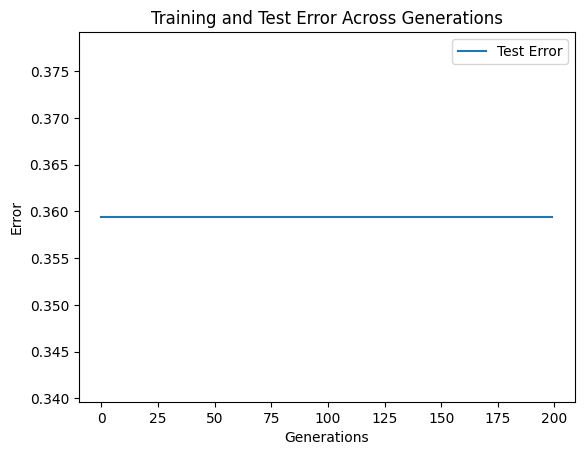

In [17]:
import matplotlib.pyplot as plt

def plot_errors(loss_test):
    plt.plot(loss_test, label='Test Error')
    plt.xlabel('Generations')
    plt.ylabel('Error')
    plt.title('Training and Test Error Across Generations')
    plt.legend()
    plt.show()

plot_errors(loss_test)


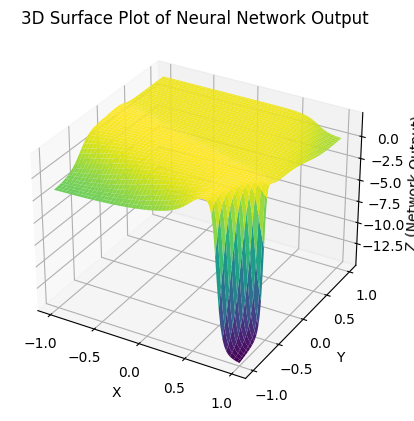

In [18]:
def plot_surface(model):
    x_range = np.linspace(-1, 1, 100)
    y_range = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x_range, y_range)
    grid_points = np.column_stack((X.flatten(), Y.flatten()))

    with torch.no_grad():
        Z = model(torch.tensor(grid_points, dtype=torch.float32)).reshape(X.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z (Network Output)')
    ax.set_title('3D Surface Plot of Neural Network Output')
    plt.show()

# Set the final weights back to the model
final_weights = separatevariables(best_ind)
set_weights_to_network(model, np.array(final_weights))

# Plot the surface
plot_surface(model)


Implement the Baldwinian learning approach to replace the Lamarckian approach in Question 1.8 and plot the results. Show
a plot of the training and test error across the generations, and also a 3D surface plot of the function implemented by the neural network across the range [-1,1]. Analyse the difference in the results compared to those obtained in
Question 1.8 and discuss possible reasons .

In [19]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sympy.combinatorics.graycode import gray_to_bin
from deap import creator, base, tools

# Define the neural network class
class Network(nn.Module):
    def __init__(self, n_features, n_hidden1, n_hidden2, n_output):
        super(Network, self).__init__()
        self.hidden1 = nn.Linear(n_features, n_hidden1)
        self.hidden2 = nn.Linear(n_hidden1, n_hidden2)
        self.output = nn.Linear(n_hidden2, n_output)

    def forward(self, x):
        x = torch.sigmoid(self.hidden1(x))
        x = torch.sigmoid(self.hidden2(x))
        x = self.output(x)
        return x

# Create classes for individual and fitness
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Define hyperparameters
popSize = 50  # Population size
dimension = 67  # Number of decision variables
numOfBits = 30  # Number of bits in each decision variable
iterations = 100  # Number of generations
dspInterval = 10  # Display interval
nElitists = 1  # Number of elite individuals selected
learning_rate = 0.01  # Define the learning rate
crossProb = 0.6  # Crossover probability
flipProb = 1. / (dimension * numOfBits)  # Bit mutate probability
mutateProb = 0.1  # Mutation probability
maxnum = 2 ** numOfBits  # Absolute max size of number coded by binary list

# Register DEAP toolbox
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_bool, numOfBits * dimension)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the fitness evaluation function
def eval_fitness(individual):
    weights = separate_variables(individual)
    set_weights_to_network(model, np.array(weights))
    outputs = model(x_train)
    loss = loss_function(outputs, y_train)
    fitness_value = 1.0 / (0.01 + loss.item())  # Calculate fitness value
    return (fitness_value,)  # Return as a tuple

# Register the evaluation function
toolbox.register("evaluate", eval_fitness)

# Register crossover and mutation operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)

# Register selection operator
toolbox.register("select", tools.selRoulette, fit_attr='fitness')

# Convert chromosome to real number
def chrom2real(c):
    ind_as_string = ''.join(map(str, c))
    degray = gray_to_bin(ind_as_string)
    num_as_int = int(degray, 2)
    num_in_range = -20 + 40 * num_as_int / maxnum
    return num_in_range

# Convert concatenated list of binary variables to tuple of real numbers
def separate_variables(ind):
    ind = np.array(ind).reshape((dimension, numOfBits))
    return [chrom2real(sv) for sv in ind]

# Set weights to the network
def set_weights_to_network(model, weights):
    pointer = 0
    for param in model.parameters():
        numel = param.numel()
        param.data = torch.from_numpy(weights[pointer:pointer+numel].reshape(param.size())).float()
        pointer += numel

# Main evolutionary algorithm
def main():
    loss_train = []
    pop = toolbox.population(n=popSize)
    
    # Evaluate the initial population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    print("Initial fitness values:", [ind.fitness.values[0] for ind in pop])
    
    for g in range(iterations):
        print("-- Generation %i --" % g)
        
        # Select the next generation individuals
        offspring = tools.selBest(pop, nElitists) + toolbox.select(pop, len(pop) - nElitists)
        offspring = list(map(toolbox.clone, offspring))
        
        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < crossProb:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        
        for mutant in offspring:
            if random.random() < mutateProb:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        
        # Evaluate the offspring
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        
        # Record training error for this generation
        best_ind = tools.selBest(pop, 1)[0]
        loss_train.append(1 / best_ind.fitness.values[0])
        
        if g % dspInterval == 0:
            print("  Min fitness:", min(ind.fitness.values[0] for ind in pop))
            print("  Max fitness:", max(ind.fitness.values[0] for ind in pop))
            print("  Avg fitness:", np.mean([ind.fitness.values[0] for ind in pop]))
            print("  Std fitness:", np.std([ind.fitness.values[0] for ind in pop]))
    
    print("-- End of evolution --")
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual:", best_ind, "Fitness:", best_ind.fitness.values)
    
    return loss_train, best_ind

if __name__ == "__main__":
    loss_train, best_ind = main()


Initial fitness values: [0.0021764977500720196, 0.0014930784041934273, 0.0005231437491890697, 0.02403304446801551, 0.02111260721028396, 0.0013702641328970741, 0.046965623085925653, 0.0007732752654959256, 0.0005684831766577876, 0.005315492881591793, 0.0009388653430914694, 0.02638694571570395, 0.0040232734582626535, 0.001146970680878395, 0.08121637583671047, 0.008284220082937107, 0.006066775618807781, 0.00720375759322283, 0.005821339336617949, 0.002787969978967741, 0.0016374110299364948, 0.0050322391797482085, 0.13203649756669525, 0.0025468135386344432, 0.003157600675541529, 0.0065509813369243036, 0.0034498871589582086, 0.01210818991381055, 0.04453010788657998, 0.0025793808876289443, 0.000726414371699736, 0.002027401138134294, 0.0011797454322494808, 0.0013164022407942924, 0.0038592046626729835, 0.0063995554308836616, 0.003202221954267197, 0.07241186022208329, 0.002274212399395216, 0.00036155958004558184, 0.002018626750202002, 0.0006469318791281827, 0.0017376803069225357, 0.02189059132824

The first code (1.9) segment appears to be incomplete, lacking the definition of the neural network architecture and training process. 

In contrast, the second code (1.8) segment defines a neural network class (`Network`), the fitness evaluation function (`eval_sphere`), and the main evolutionary algorithm (`main`). It also includes a training loop within the `eval_sphere` function, where the neural network is trained using the input data (`x_train` and `y_train`) for a fixed number of iterations.

Here are some key differences between the two code segments:

1. **Neural Network Definition**: The second code segment defines a neural network class (`Network`), whereas the first code segment does not include any neural network architecture.

2. **Fitness Evaluation Function**: In the second code segment, the fitness evaluation function (`eval_sphere`) not only evaluates the individual's fitness but also trains the neural network using input data (`x_train` and `y_train`). This allows for the integration of neural network training within the evolutionary algorithm.

3. **Training Process**: The second code segment includes a training loop within the `eval_sphere` function, where the neural network is trained for a fixed number of iterations using input data (`x_train` and `y_train`). This training process is missing in the first code segment.

4. **Evolutionary Algorithm**: Both code segments implement an evolutionary algorithm using the DEAP framework, but the second code segment incorporates neural network training within the evaluation process.

Overall, the second code segment integrates the neural network training process into the evolutionary algorithm, allowing for end-to-end optimization of both the neural network weights and the evolutionary algorithm parameters.
